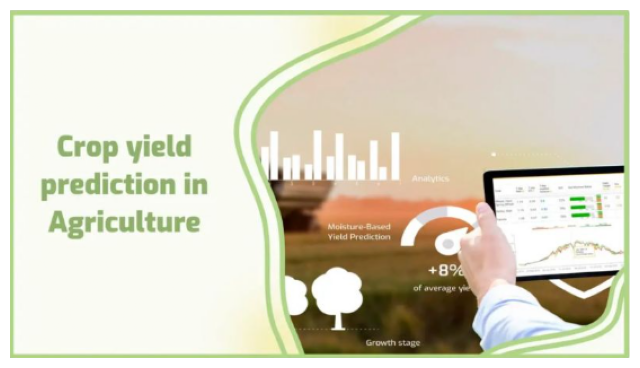

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread("/content/head photo.PNG")

plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis("off")
plt.show()

# Crop Yield Prediction 🌾

## Datasetin oxunması və təmizlənməsi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/Crop_yield_with_weather (3).csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,pesticides_tonnes,lat,lon,avg_temp,total_precip,total_snow
0,0,Albania,Maize,1990,36613,121.0,41.000028,19.999962,14.74,658.7,21.98
1,1,Albania,Potatoes,1990,66667,121.0,41.000028,19.999962,14.74,658.7,21.98
2,2,Albania,"Rice, paddy",1990,23333,121.0,41.000028,19.999962,14.74,658.7,21.98
3,3,Albania,Sorghum,1990,12500,121.0,41.000028,19.999962,14.74,658.7,21.98
4,4,Albania,Soybeans,1990,7000,121.0,41.000028,19.999962,14.74,658.7,21.98


In [ ]:
# Artıq indeks sütununu silirik
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head()

,Area,Item,Year,hg/ha_yield,pesticides_tonnes,lat,lon,avg_temp,total_precip,total_snow
0,Albania,Maize,1990,36613,121.0,41.000028,19.999962,14.74,658.7,21.98
1,Albania,Potatoes,1990,66667,121.0,41.000028,19.999962,14.74,658.7,21.98
2,Albania,"Rice, paddy",1990,23333,121.0,41.000028,19.999962,14.74,658.7,21.98
3,Albania,Sorghum,1990,12500,121.0,41.000028,19.999962,14.74,658.7,21.98
4,Albania,Soybeans,1990,7000,121.0,41.000028,19.999962,14.74,658.7,21.98


In [ ]:
df.tail()

,Area,Item,Year,hg/ha_yield,pesticides_tonnes,lat,lon,avg_temp,total_precip,total_snow
28237,Zimbabwe,"Rice, paddy",2013,22581,2550.07,-18.455496,29.746841,21.7,680.8,0.0
28238,Zimbabwe,Sorghum,2013,3066,2550.07,-18.455496,29.746841,21.7,680.8,0.0
28239,Zimbabwe,Soybeans,2013,13142,2550.07,-18.455496,29.746841,21.7,680.8,0.0
28240,Zimbabwe,Sweet potatoes,2013,22222,2550.07,-18.455496,29.746841,21.7,680.8,0.0
28241,Zimbabwe,Wheat,2013,22888,2550.07,-18.455496,29.746841,21.7,680.8,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               28242 non-null  object 
 1   Item               28242 non-null  object 
 2   Year               28242 non-null  int64  
 3   hg/ha_yield        28242 non-null  int64  
 4   pesticides_tonnes  28242 non-null  float64
 5   lat                28242 non-null  float64
 6   lon                28242 non-null  float64
 7   avg_temp           27140 non-null  float64
 8   total_precip       27140 non-null  float64
 9   total_snow         27140 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
df.describe()

,Year,hg/ha_yield,pesticides_tonnes,lat,lon,avg_temp,total_precip,total_snow
count,28242.000000,28242.000000,28242.000000,28242.000000,28242.000000,27140.000000,27140.000000,27140.000000
mean,2001.544296,77053.332094,37076.909344,15.284326,18.063165,19.424130,1207.582509,20.503077
std,7.051905,84956.612897,59958.784665,23.732050,71.019621,7.349487,1343.070175,74.099304
min,1990.000000,50.000000,0.040000,-41.500083,-107.991707,-7.860000,0.000000,0.000000
25%,1995.000000,19919.250000,1702.000000,-2.483383,-53.200000,16.400000,451.200000,0.000000
50%,2001.000000,38295.000000,17529.440000,22.351115,24.991639,22.240000,1012.700000,0.000000
75%,2008.000000,104676.750000,48687.880000,30.330840,78.667743,24.810000,1511.900000,0.140000
max,2013.000000,501412.000000,367778.000000,63.246778,172.834408,29.960000,18111.000000,924.910000


### 📊 Statistik Xülasə
1.Mean > Median (77,053 > 38,295) olması datanın sağa meyilli (Right Skewed) olduğunu göstərir.
2.Məlumatların 75%-i (Q3) 104,676 Hg/Ha-dan aşağıdır; bu da məhsuldarlığın böyük hissəsinin aşağı və orta diapazonda cəmləşdiyini göstərir.
3.Pestisid İstifadəsi: Pestisid istifadəsi minimum 0.04 tondan maksimum 367,778 tona qədər dəyişir, bu da müxtəlif ölkələrdə və ya ərazilərdə kənd təsərrüfatı texnologiyalarının fərqli tətbiqini simvolizə edir.

In [ ]:
df.shape

(28242, 10)

Datsetdə 28242 sətir və 10 sütun var

In [ ]:
# Boş (null) dəyərləri yoxlayırıq
df.isna().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
pesticides_tonnes,0
lat,0
lon,0
avg_temp,1102
total_precip,1102
total_snow,1102


Datasetdə 1102 null dəyər mövcuddur. Növbəti kodda bu null dəyərlər yoxlanılacaq və əvəz olunacaq.

In [ ]:
# Hansı ölkədə neçə null deyer var?
null_counts = df[df['avg_temp'].isnull()].groupby('Area').size()

null_counts

,0
Area,
Malaysia,4
Morocco,14
Pakistan,945
Papua New Guinea,133
Suriname,6


In [ ]:
# Doldurulmalı olan sütunların siyahısı
columns_to_fix = ['avg_temp', 'total_precip', 'total_snow']

for col in columns_to_fix:
    # Hər ölkəni qruplaşdırırıq və nulları o qrupun ortalaması ilə doldururuq
    df[col] = df.groupby('Area')[col].transform(lambda x: x.fillna(x.mean()))

Null dəyərlər hər biri ölkələrə əsasən həmin ölkənin ortalama (mean) dəyəri ilə əvəz olundu

In [ ]:
df.duplicated().sum()

np.int64(15112)

In [ ]:
# Təkrarlanan sətirlərdən bəzilərini göstər
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())

          Area         Item  Year  hg/ha_yield  pesticides_tonnes        lat  \
378  Argentina      Cassava  1990       100000            26156.0 -34.996496   
380  Argentina        Maize  1990        34608            26156.0 -34.996496   
382  Argentina     Potatoes  1990       202747            26156.0 -34.996496   
384  Argentina  Rice, paddy  1990        36709            26156.0 -34.996496   
386  Argentina      Sorghum  1990        28116            26156.0 -34.996496   

           lon  avg_temp  total_precip  total_snow  
378 -64.967282     16.82         792.1         0.0  
380 -64.967282     16.82         792.1         0.0  
382 -64.967282     16.82         792.1         0.0  
384 -64.967282     16.82         792.1         0.0  
386 -64.967282     16.82         792.1         0.0  


In [ ]:
# Bütün dataset üzrə dublikatları ölkələrə görə saymaq
dupe_counts = df[df.duplicated()].groupby('Area').size()
print(dupe_counts.sort_values(ascending=False))

Area
India                 3864
Brazil                2070
Mexico                1288
Pakistan              1288
Japan                  805
Australia              805
Indonesia              690
Turkey                 500
South Africa           483
Canada                 460
Ecuador                414
Spain                  322
Colombia               207
United Kingdom         184
Dominican Republic     184
Argentina              184
Germany                180
Egypt                  161
Morocco                161
Italy                  161
Bangladesh             147
Iraq                   138
Kazakhstan             126
Chile                  115
Saudi Arabia            92
Libya                   69
Sudan                   14
dtype: int64


In [ ]:
# Yalnız müəyyən sütunlara görə təkrarları tapırıq
subset_cols = ['Area', 'Item', 'Year']
arg_dupes = df[df.duplicated(subset=subset_cols, keep=False) & (df['Area'] == 'Argentina')]

print(arg_dupes.head(10))

          Area         Item  Year  hg/ha_yield  pesticides_tonnes        lat  \
377  Argentina      Cassava  1990       100000            26156.0 -34.996496   
378  Argentina      Cassava  1990       100000            26156.0 -34.996496   
379  Argentina        Maize  1990        34608            26156.0 -34.996496   
380  Argentina        Maize  1990        34608            26156.0 -34.996496   
381  Argentina     Potatoes  1990       202747            26156.0 -34.996496   
382  Argentina     Potatoes  1990       202747            26156.0 -34.996496   
383  Argentina  Rice, paddy  1990        36709            26156.0 -34.996496   
384  Argentina  Rice, paddy  1990        36709            26156.0 -34.996496   
385  Argentina      Sorghum  1990        28116            26156.0 -34.996496   
386  Argentina      Sorghum  1990        28116            26156.0 -34.996496   

           lon  avg_temp  total_precip  total_snow  
377 -64.967282     16.82         792.1         0.0  
378 -64.96728

In [ ]:
#  Tam eyni olan sətirləri silirik
df = df.drop_duplicates()

# Vizuallaşdırma və əlaqələrin analizi

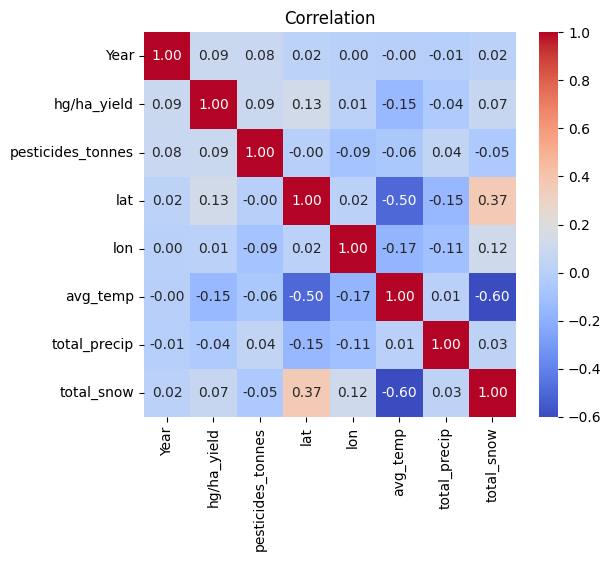

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation")
plt.show()

Məhsuldarlıq və temperatur əlaqəsi:Korelyasiyanın mənfi (-0.15) olması o deməkdir ki, temperatur artdıqca məhsuldarlıq cüzi də olsa azalma meyli göstərir. hg/ha_yield (məhsuldarlıq) ilə digər faktorlar arasında zəif korelyasiya var. Ən nəzərəçarpanı müsbət istiqamətdə Enlik (lat) (0.13) və çox cüzi olaraq Pestisidlərdir (0.09). Bu, məhsuldarlığın tək bir faktordan deyil, bir neçə faktorun kompleks təsirindən asılı olduğunu göstərir.

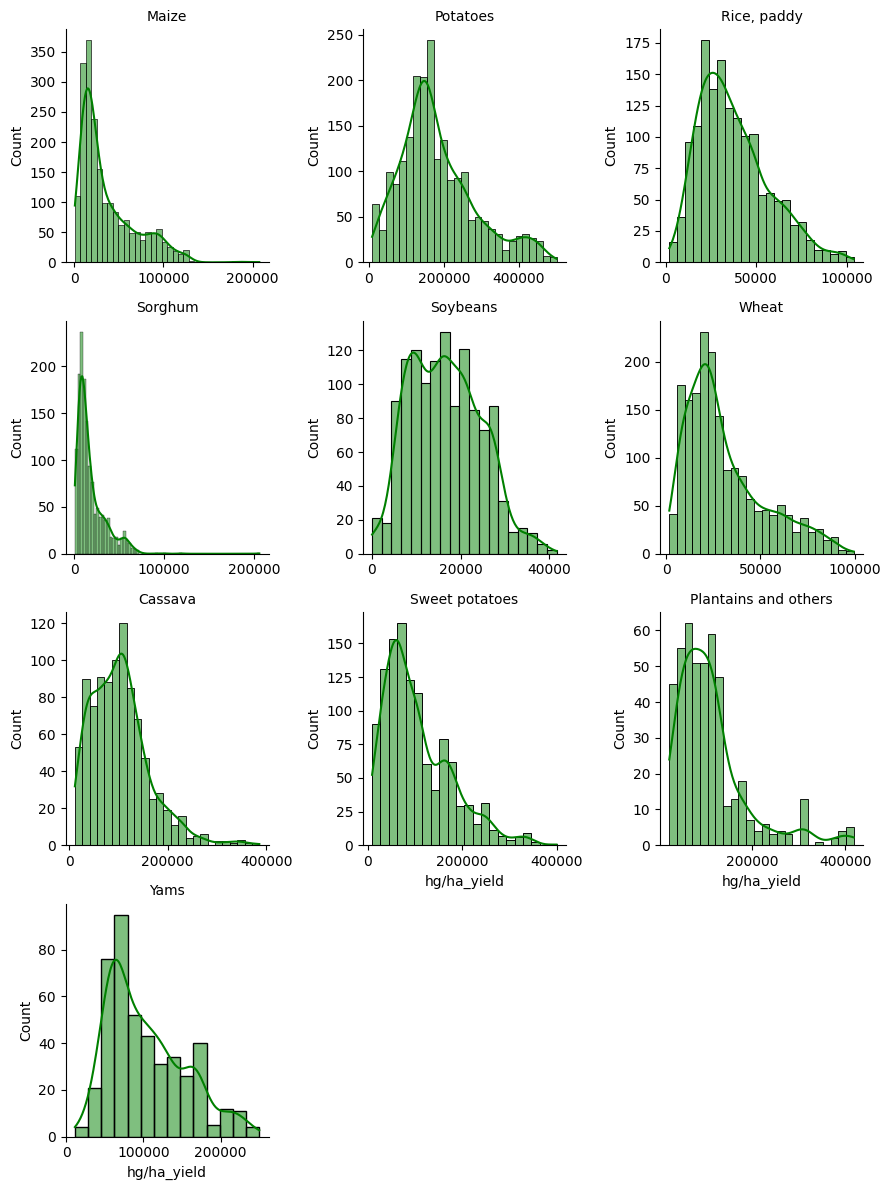

In [ ]:
# Hər məhsul üçün ayrı-ayrı paylanma qrafikləri
g = sns.FacetGrid(df, col="Item", col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, "hg/ha_yield", kde=True, color="green")
g.set_titles("{col_name}")
plt.show()

/tmp/ipython-input-772441111.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item', y='hg/ha_yield', data=df, palette="Set3")


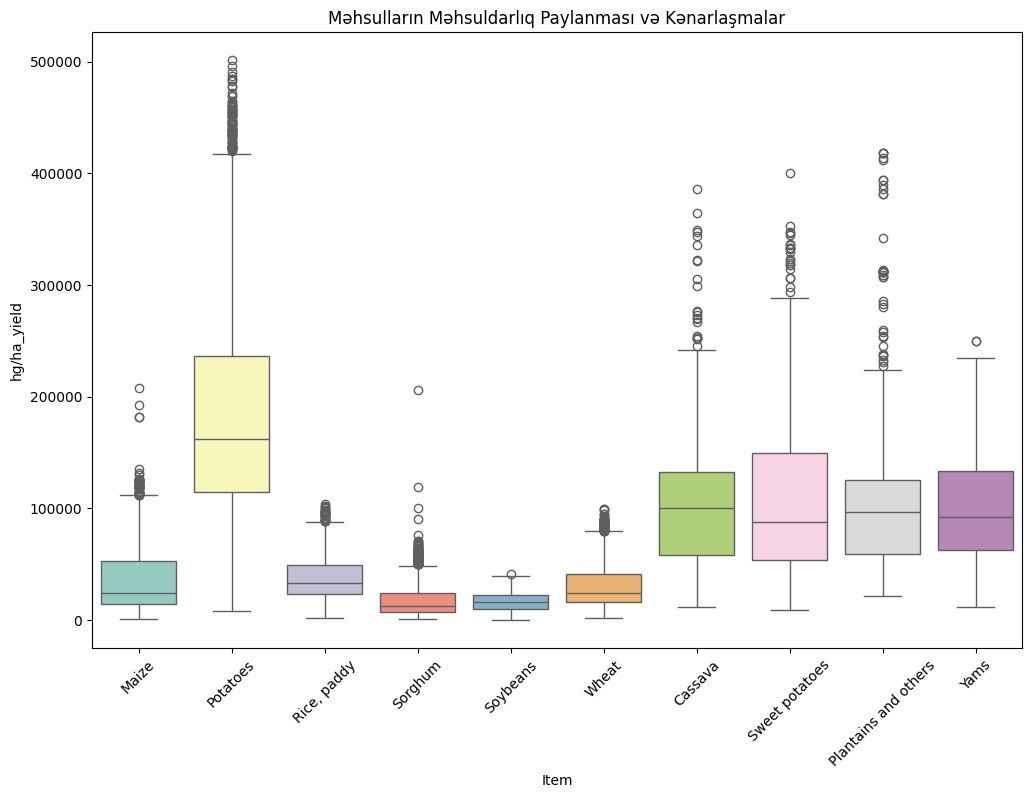

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Item', y='hg/ha_yield', data=df, palette="Set3")
plt.xticks(rotation=45)
plt.title('Məhsulların Məhsuldarlıq Paylanması və Kənarlaşmalar')
plt.show()

### Bitki növləri üzrə fərqlilik: Box Plot analizi göstərir ki, Potatoes (Kartof) ən yüksək orta məhsuldarlığa malikdir, Soybeans və Wheat isə ən stabil (dəyişkənliyi az olan) bitkilərdir.

/tmp/ipython-input-3013187755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index,  palette="cubehelix")


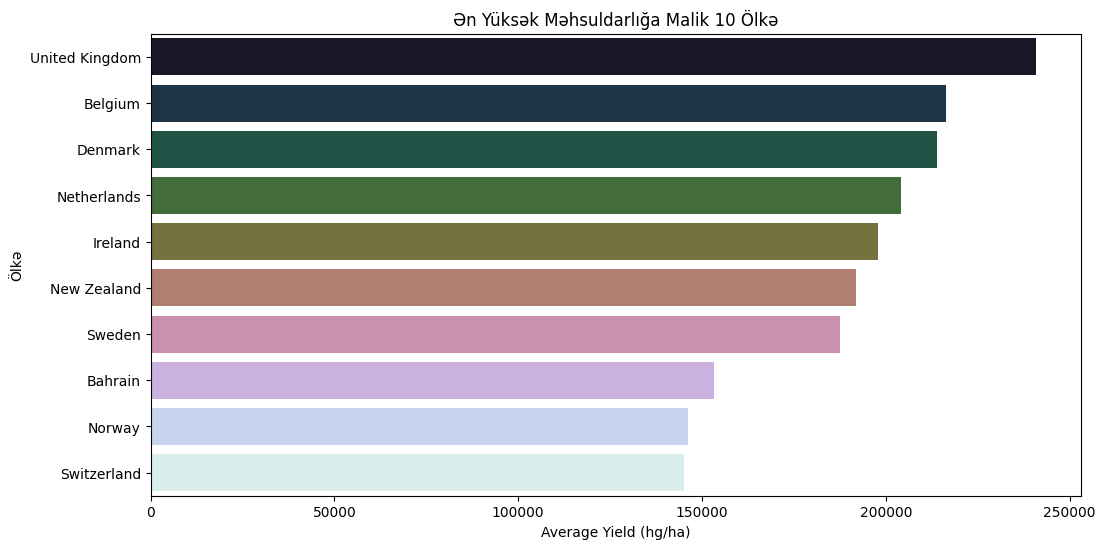

In [ ]:
plt.figure(figsize=(12,6))
top_countries = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index,  palette="cubehelix")
plt.title("Ən Yüksək Məhsuldarlığa Malik 10 Ölkə")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Ölkə")
plt.show()

/tmp/ipython-input-2940353922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="cubehelix")


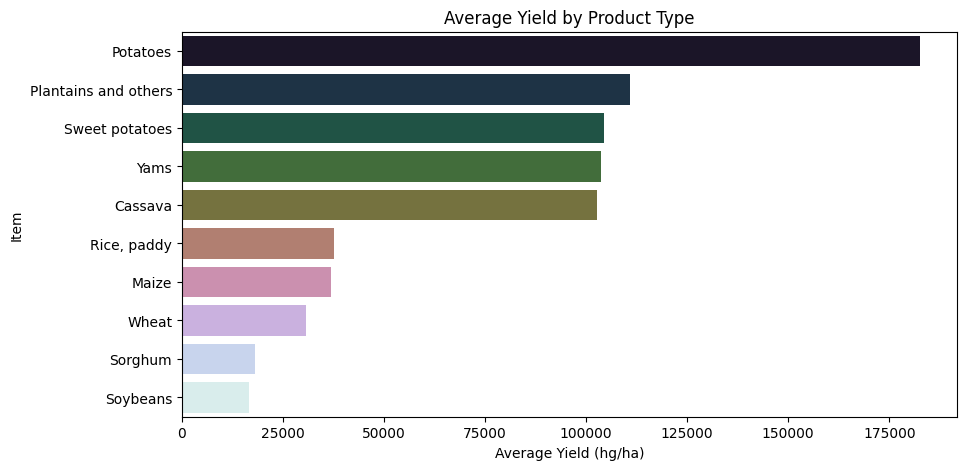

In [ ]:
plt.figure(figsize=(10,5))
top_items = df.groupby('Item')['hg/ha_yield'].mean().sort_values(ascending=False)
sns.barplot(x=top_items.values, y=top_items.index, palette="cubehelix")
plt.title("Average Yield by Product Type")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Item")
plt.show()

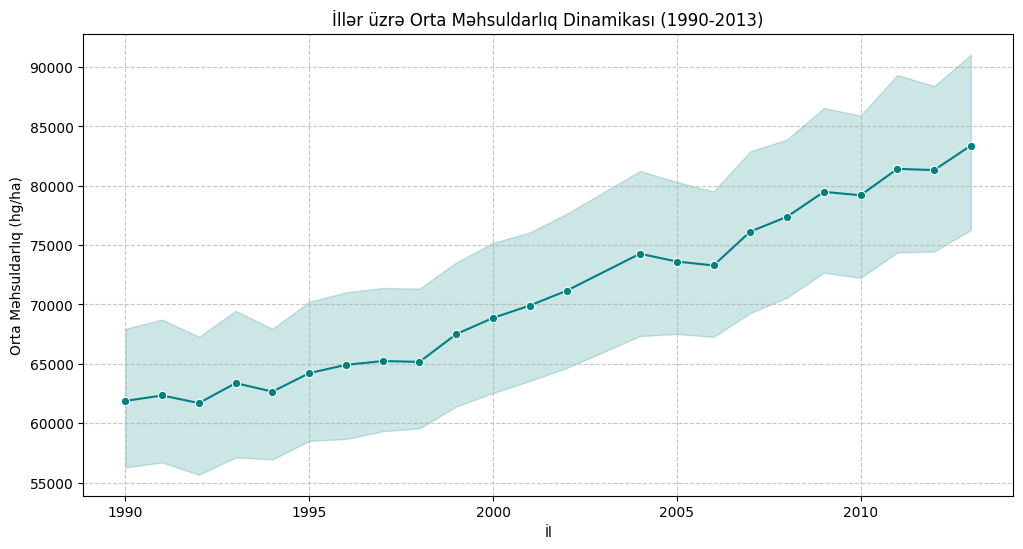

In [ ]:

plt.figure(figsize=(12, 6))
# İllər üzrə orta məhsuldarlıq
sns.lineplot(x='Year', y='hg/ha_yield', data=df, marker='o', color='teal')
plt.title('İllər üzrə Orta Məhsuldarlıq Dinamikası (1990-2013)')
plt.xlabel('İl')
plt.ylabel('Orta Məhsuldarlıq (hg/ha)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Davamlı Artış: 1990-cı ildə orta məhsuldarlıq təxminən 62,000 hg/ha civarında ikən, 2013-cü ilə qədər bu rəqəm 83,000 hg/ha-dan yuxarı qalxıb. Bu, təxminən 34%-lik bir artım deməkdir.

### İnkişafın Sürətlənməsi: Xüsusilə 1998-ci ildən sonra artım tempinin daha da sürətləndiyini və xəttin daha dik qalxdığını görürük. Bu, həmin dövrdə yeni aqrar texnologiyaların (suvarma, gübrə, toxum islahatı) daha geniş tətbiqi ilə əlaqəli ola bilər.

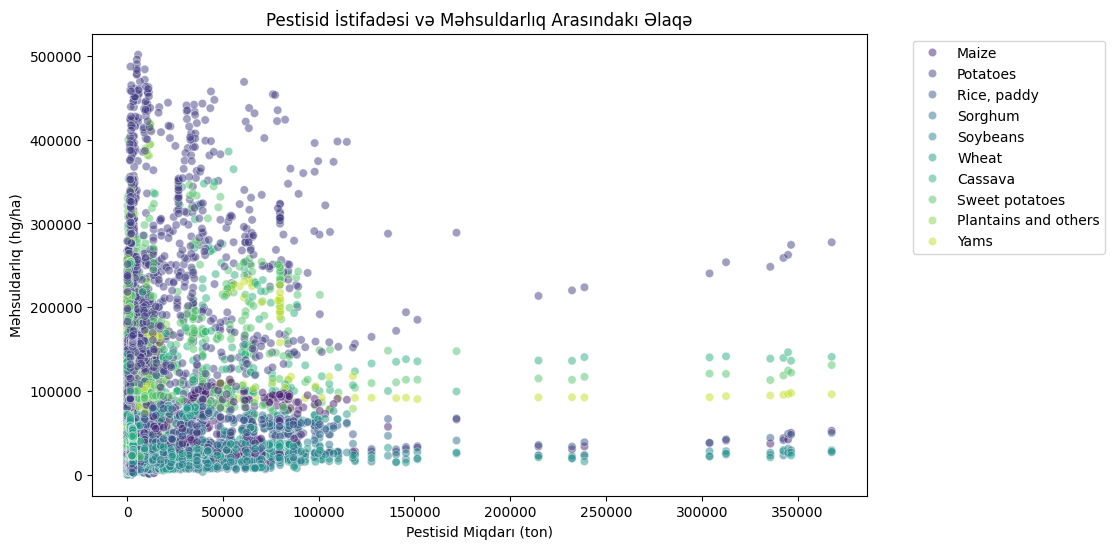

In [ ]:
plt.figure(figsize=(10, 6))
# Pestisid və Məhsuldarlıq arasındakı əlaqə
sns.scatterplot(x='pesticides_tonnes', y='hg/ha_yield', data=df, alpha=0.5, hue='Item', palette='viridis')
plt.title('Pestisid İstifadəsi və Məhsuldarlıq Arasındakı Əlaqə')
plt.xlabel('Pestisid Miqdarı (ton)')
plt.ylabel('Məhsuldarlıq (hg/ha)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 🧪 Pestisid və məhsuldarlıq əlaqəsinin analizi
xətti əlaqə: Qrafikdən görünür ki, pestisid miqdarının kəskin artması (məsələn, 200,000 tondan çox) hər zaman məhsuldarlığın artması ilə nəticələnmir. Datasetdəki bir çox rekord məhsuldarlıq göstəriciləri (xüsusilə Potatoes üçün) əslində pestisid istifadəsinin nisbətən az olduğu (0 - 50,000 ton arası) bölgələrdə cəmləşib.